In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leaf-classification/train.csv.zip
/kaggle/input/leaf-classification/images.zip
/kaggle/input/leaf-classification/test.csv.zip
/kaggle/input/leaf-classification/sample_submission.csv.zip


**Importing Packages**

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss

**Splitting the data**

In [3]:
train_df = pd.read_csv('/kaggle/input/leaf-classification/train.csv.zip')
test_df = pd.read_csv('/kaggle/input/leaf-classification/test.csv.zip')

**Preprocessing the data**

In [4]:
# Preprocess the data to fit for the classifier
label_encoder = LabelEncoder().fit(train_df.species) # Instantiate a LabelEncoder and fit to the given label data
labels = label_encoder.transform(train_df.species)  # encode species strings and return labels with value between 0 and n_classes-1
classes = list(label_encoder.classes_)  # Save the species
test_ids = test_df.id  # Save the image ids in test dataset

train = train_df.drop(['id', 'species'], axis=1)
test = test_df.drop(['id'], axis=1)

In [5]:
s = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
s.get_n_splits(train, labels)

for train_index, test_index in s.split(train, labels):   
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

**Classifier Comparison**

LinearDiscriminantAnalysis
Accuracy: 97.47474747474747%
Log Loss: 0.5108204944709146


QuadraticDiscriminantAnalysis
Accuracy: 1.0101010101010102%
Log Loss: 34.189899865669254


KNeighborsClassifier
Accuracy: 87.87878787878788%
Log Loss: 2.2502083078831476




/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


AdaBoostClassifier
Accuracy: 3.0303030303030303%
Log Loss: 4.290979467326837


GradientBoostingClassifier
Accuracy: 67.67676767676768%
Log Loss: 3.211603677351602


RandomForestClassifier
Accuracy: 95.95959595959596%
Log Loss: 0.7792212862106489


DecisionTreeClassifier
Accuracy: 68.18181818181817%
Log Loss: 10.989610671108045


GaussianNB
Accuracy: 55.05050505050505%
Log Loss: 15.506623400535767




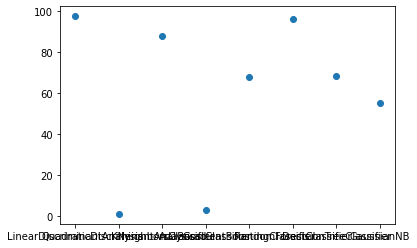

In [6]:
classifiers = [
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    KNeighborsClassifier(3),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    GaussianNB()
]

classifiers_ = [
    "LinearDiscriminantAnalysis",
    "QuadraticDiscriminantAnalysis",
    "KNeighborsClassifier",
    "AdaBoostClassifier",
    "GradientBoostingClassifier",
    "RandomForestClassifier",
    "DecisionTreeClassifier",
    "GaussianNB"
]
x = 0
score = [None] * 8
for clf in classifiers:
    clf.fit(X_train, y_train)
    
    print(clf.__class__.__name__)
    
    #Accuracy of the model
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions) * 100
    score[x] = accuracy
    x += 1
    print("Accuracy: " + str(accuracy) + "%")
    
    #Log loss of the model
    predictions = clf.predict_proba(X_test)
    logloss = log_loss(y_test, predictions)
    print("Log Loss: " + str(logloss) + "\n\n")
    
plt.scatter(classifiers_, score)
plt.show()